---
title: "Who is Exposed to Coastal Hazards in Puerto Rico?"
author: 
   - Deborah Balk 
   - Kytt MacManus
   - Hieu Tran 
   - Camilla Green 
   - Shemontee Chowdhury
format: 
    html
bibliography: lecz-references.bib
---

## Datasets:
- VIIRS Nighttime Lights
- LECZ
- NHGIS
- LiDAR SAR

## Areas of Interest (AOIs):
- Puerto Rico (PRI)

## Functions:
- Image segmentation
- Validation with SAR or LiDAR

# Overview

In this lesson, you will use the dataset delineating [Low Elevation Coastal Zones](https://sedac.ciesin.columbia.edu/data/set/lecz-low-elevation-coastal-zones) from the NASA Socioeconomic Data and Applications Center (SEDAC) website along with census data from the [US Census Bureau](https://www.census.gov/data.html). 

You will perform various preprocessing tasks to prepare the raw spatial data for analysis. These steps include exploring the dataset with visualizations and thematic mapping tools. You will then learn how to generate summary statistics based on combinations of these two layers, over two different time periods. 

You will learn how to perform numerous data manipulations, create statistical summaries of population-at-risk (and related housing characteristics), and examine a decade of change throughout this lesson.

# Learning Objectives

- Become familiar with Low Elevation Coastal Zones (LECZs) and explain their significance (as well as limitations) in assessing coastal hazard exposure.
- Access, integrate, explore, and use LECZ data from NASA SEDAC and demographic data from the US Census Bureau for Puerto Rico.
- Assess decadal changes (2010–2020) in population and housing characteristics in coastal versus non-coastal zones in Puerto Rico.
- Create regional and local scale maps and statistical figures of exposure and decadal change.
- Identify venues for sharing output (for example, discussion board associated with data, policy briefs, op-eds).

# Introduction

Low Elevation Coastal Zones (LECZs) have been defined globally, with population estimates for areas below 5m and 10m elevations [@mcgranahan2007; @macmanus2021]. In the continental U.S. (CONUS), 1 in 10 people live in the 10m LECZ, and studies highlight that urban residents, people of color, and older adults are disproportionately exposed. For instance, about 1 in 5 urban Black residents live in this zone [@tagtachian2023; @hauer2020sea].

This is the sneak peak of what LECZ looks like:
![](data/lecz_pr/lecz_satellite.png)

You may wonder why studies of the “entire” US often restrict themselves to the CONUS? The simplest answer is limitations either data or computational power. For example, this happens because of incomplete coverage in one data set or another. Some US territories may not collect the full suite of census variables that are collected in CONUS. For example the detail on housing characteristics is limited in Guam, Northern Mariana Islands, US Virgin Islands and American Samoa, and the Census’ American Community Survey is not conducted in any of the territories, though Puerto Rico conducts its own Community Survey. In some other cases, data collected from satellites (such as SRTM) have variable accuracy toward polar regions [U.S Census Bureau](https://docs.google.com/document/d/1bKYopZoMLCD2djl2vc3pwNSKwGDk6TKRI79swefIvKY/edit?tab=t.0). 

Another possible reason for omission outside of CONUS could be computational challenges or limitations. For instance US territories are subject to different map projections, which implies the need for additional functions in processing algorithms to account for spatial variations and to unify spatial structures.

# Additional Resources

### “What is a Map Projection?”
Map projections have existed for thousands of years. They help map makers render the spherical surface of the Earth flat -- so it can be seen on a piece of paper or computer screen, and so that the unit of measure is uniform throughout the area of interest. As a result, map projections distort something -- area, shape, distance, direction -- to make this possible. 

Here are some resources to learn more about map projections:

[A brief video explainer](https://www.youtube.com/watch?v=wlfLW1j05Dg)

[A brief guide from USGS](https://pubs.usgs.gov/gip/70047422/report.pdf)

There are many resources to guide a new learner, so enjoy learning! 

# Accessing Data

This lesson uses the Python language. 

These are the equired packages to run this lesson `impumspy`, `pandas`, `arcgis`, `zipfile`, and `numpy`. Optional packages include `glob`, `geopandas`, and `earthaccess`.

In [136]:
# from ipumspy import readers, ddi
# from ipumspy.api import IpumsApiClient
# from ipumspy import AggregateDataExtract


# from dotenv import load_dotenv
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.colors as colors
# import os
# from matplotlib.ticker import FuncFormatter
import arcgis
from arcgis.gis import GIS

# # from arcgis.map import Map
# from arcgis.raster import Raster
# from arcgis.features import GeoAccessor

# from arcgis.map.renderers import (
#     ClassBreaksRenderer,
#     ClassBreakInfo,
#     UniqueValueRenderer,
#     UniqueValueInfo,
#     SizeInfoVisualVariable,
# )

# from arcgis.mapping.symbol import SimpleLineSymbol, SimpleFillSymbol

# import geopandas as gpd
# import glob
# from zipfile import ZipFile
# import earthaccess as ea
# import requests
# import pprint
# import re



# Standard libraries
import os
import glob
import re
from zipfile import ZipFile
from dotenv import load_dotenv
import pprint
import requests

# Data manipulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import FuncFormatter

# Geospatial libraries
import geopandas as gpd
import arcgis
from arcgis.gis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.raster import Raster
from arcgis.map import Map  # For using WebMap, MapView, etc.
# from arcgis.features import GeoAccessor

from arcgis.map.renderers import (
    ClassBreaksRenderer,
    ClassBreakInfo,
    UniqueValueRenderer,
    UniqueValueInfo,
    SizeInfoVisualVariable,
)

from arcgis.map.symbols import SimpleLineSymbolEsriSLS, SimpleFillSymbolEsriSFS

# Earthdata access
import earthaccess as ea

# IPUMS API and DDI access
from ipumspy.api import IpumsApiClient
from ipumspy import AggregateDataExtract, readers, ddi

from ipumspy import readers, ddi
from ipumspy.api import IpumsApiClient
from ipumspy import AggregateDataExtract


This lesson uses arcgis version of 2.4.0 or higher:

In [ ]:
# Check the arcgis version for mapping properly 
arcgis.__version__

If arcgis version is lower, use `pip install`:

In [ ]:
pip install arcgis==2.4.1.1

## Using IPUMS API to pull U.S Census Data for Puerto Rico


### Registering to IPUMS and the National Historical Geographic Information System (NHGIS) 

In order to retrieve an IPUMS API Key, you will have to register for an account for IPUMS and request your [API Key](https://account.ipums.org/api_keys).

Additionally register, to [The National Historical Geographic Information System (NHGIS)](https://uma.pop.umn.edu/nhgis/registration)

After you requested your IPUMS API, to the NHGIS, store it in `os.env` format. You will need your registration email and the API Key:


In [ ]:
from dotenv import load_dotenv
import os
from ipumspy.api import IpumsApiClient
import pprint

# Step 1: Load API key from .env file
load_dotenv()
IPUMS_API_KEY = os.getenv("EMAIL", "API_KEY")

if IPUMS_API_KEY is None:
    raise ValueError("API key not found. Make sure IPUMS_API_KEY is defined in your .env file.")

# Step 2: Initialize IPUMS client
ipums = IpumsApiClient(IPUMS_API_KEY)


In [ ]:
ipums 

Getting shapefile metadata in order to get the filename for downloading the shapefile in the below chunk.

This block will be returning the shapefile name of interest so that we can download it in the next block


In [ ]:
# After registering to NHGIS, please run this code

for page in ipums.get_metadata_catalog("nhgis", metadata_type="shapefiles"):
    for shapefile in page["data"]:
        if shapefile["extent"] in ["Puerto Rico", "United States"]:
            if shapefile["geographicLevel"] in ["ZCTA", "ZIP Code Tabulation Area"]:
                print(f"Name: {shapefile['name']} | Year: {shapefile['year']}")

### Downlaoding shapefiles from IPUMS

With this API key, we can extract geospatial data from the IPUMS API


In [ ]:
from ipumspy.api.extract import NhgisDataset
#Submit extraction data to IPUMS portal
extract = AggregateDataExtract(
    collection="nhgis",
    description="Puerto Rico 2010–2020 vacancy",
    datasets=[
        NhgisDataset(name="2010_SF1a", data_tables=["P12", "H3"], geog_levels=["blck_grp"]),
        NhgisDataset(name="2020_DHCa", data_tables=["P12", "H3"], geog_levels=["blck_grp"]),
    ],
    geographic_extents=["720"]
    #    shapefiles=["720_blck_grp_2020_tl2020"]  to download shapefiles
)


In [ ]:
extract

Getting data from 2010 and 2020 with the variables are Total Housing Units and Occupancy Status as H1 and H3 respectively. 


In [ ]:
#Submit the extract request
ipums.submit_extract(extract)
print(f"Extract ID: {extract.extract_id}")

#Wait for the extract to finish
ipums.wait_for_extract(extract)

In [ ]:
# #Download the extract
current = os.getcwd()
DOWNLOAD_DIR = os.path.join(f"{current}/data/ipums/block") #Change to your storage location

# Create the directory if it doesn't exist
os.makedirs(DOWNLOAD_DIR, exist_ok=True)

ipums.download_extract(extract, download_dir=DOWNLOAD_DIR)

In [4]:
current = os.getcwd()
DOWNLOAD_DIR = os.path.join(f"{current}/lecz_notebook/data") #Change to your storage location
file_list = os.listdir(DOWNLOAD_DIR)
csv_zip = [f for f in file_list if f.endswith('_csv.zip')]
csv = f"{DOWNLOAD_DIR}/{csv_zip[0]}" 

# Read zip data file in the extract
with ZipFile(csv) as z:
    csv_data = z.namelist()
    print("Contents of zip: ", csv_data)
    
    # Find the correct CSVs using filename patterns
    file_2020 = next(f for f in csv_data if '2020' in f and f.endswith('.csv'))
    file_2010 = next(f for f in csv_data if '2010' in f and f.endswith('.csv'))

    # Read CSVs into DataFrames
    with z.open(file_2020) as f:
        df_2020 = pd.read_csv(f)

    with z.open(file_2010) as f:
        df_2010 = pd.read_csv(f)

Contents of zip:  ['nhgis0021_csv/nhgis0021_ds172_2010_blck_grp.csv', 'nhgis0021_csv/nhgis0021_ds258_2020_blck_grp.csv', 'nhgis0021_csv/nhgis0021_ds172_2010_blck_grp_codebook.txt', 'nhgis0021_csv/nhgis0021_ds258_2020_blck_grp_codebook.txt']


In [6]:
# The NHGIS codes are as follows in the documentation which is downloaded from the IPUMS API 

# Rename columns for dataframe 2020

'''    Table 1:     Sex by Age for Selected Age Categories
    Universe:    Total population
    Source code: P12
    NHGIS code:  U7S
        U7S001:      Total
        U7S002:      Male
        U7S003:      Male: Under 5 years
        U7S004:      Male: 5 to 9 years
        U7S005:      Male: 10 to 14 years
        U7S006:      Male: 15 to 17 years
        U7S007:      Male: 18 and 19 years
        U7S008:      Male: 20 years
        U7S009:      Male: 21 years
        U7S010:      Male: 22 to 24 years
        U7S011:      Male: 25 to 29 years
        U7S012:      Male: 30 to 34 years
        U7S013:      Male: 35 to 39 years
        U7S014:      Male: 40 to 44 years
        U7S015:      Male: 45 to 49 years
        U7S016:      Male: 50 to 54 years
        U7S017:      Male: 55 to 59 years
        U7S018:      Male: 60 and 61 years
        U7S019:      Male: 62 to 64 years
        U7S020:      Male: 65 and 66 years
        U7S021:      Male: 67 to 69 years
        U7S022:      Male: 70 to 74 years
        U7S023:      Male: 75 to 79 years
        U7S024:      Male: 80 to 84 years
        U7S025:      Male: 85 years and over
        U7S026:      Female
        U7S027:      Female: Under 5 years
        U7S028:      Female: 5 to 9 years
        U7S029:      Female: 10 to 14 years
        U7S030:      Female: 15 to 17 years
        U7S031:      Female: 18 and 19 years
        U7S032:      Female: 20 years
        U7S033:      Female: 21 years
        U7S034:      Female: 22 to 24 years
        U7S035:      Female: 25 to 29 years
        U7S036:      Female: 30 to 34 years
        U7S037:      Female: 35 to 39 years
        U7S038:      Female: 40 to 44 years
        U7S039:      Female: 45 to 49 years
        U7S040:      Female: 50 to 54 years
        U7S041:      Female: 55 to 59 years
        U7S042:      Female: 60 and 61 years
        U7S043:      Female: 62 to 64 years
        U7S044:      Female: 65 and 66 years
        U7S045:      Female: 67 to 69 years
        U7S046:      Female: 70 to 74 years
        U7S047:      Female: 75 to 79 years
        U7S048:      Female: 80 to 84 years
        U7S049:      Female: 85 years and over
 
    Table 2:     Occupancy Status
    Universe:    Housing units
    Source code: H3
    NHGIS code:  U9X
        U9X001:      Total
        U9X002:      Occupied
        U9X003:      Vacant
'''


rename_2020 = {
    "U7S001": "Total_Population",
    "U7S002": "Male",
    "U7S003": "Male: Under 5 years",
    "U7S004": "Male: 5 to 9 years",
    "U7S005":      "Male: 10 to 14 years",
    "U7S006":      "Male: 15 to 17 years",
    "U7S007":      "Male: 18 and 19 years",
    "U7S008":      "Male: 20 years",
    "U7S009":      "Male: 21 years",
    "U7S010":      "Male: 22 to 24 years",
    "U7S011":      "Male: 25 to 29 years",
    "U7S012":      "Male: 30 to 34 years",
    "U7S013":      "Male: 35 to 39 years",
    "U7S014":      "Male: 40 to 44 years",
    "U7S015":      "Male: 45 to 49 years",
    "U7S016":      "Male: 50 to 54 years",
    "U7S017":      "Male: 55 to 59 years",
    "U7S018":      "Male: 60 and 61 years",
    "U7S019":      "Male: 62 to 64 years",
    "U7S020":      "Male: 65 and 66 years",
    "U7S021":      "Male: 67 to 69 years",
    "U7S022":      "Male: 70 to 74 years",
    "U7S023":      "Male: 75 to 79 years",
    "U7S024":      "Male: 80 to 84 years",
    "U7S025":      "Male: 85 years and over",
    "U7S026":      "Female",
    "U7S027":      "Female: Under 5 years",
    "U7S028":      "Female: 5 to 9 years",
    "U7S029":      "Female: 10 to 14 years",
    "U7S030":      "Female: 15 to 17 years",
    "U7S031":      "Female: 18 and 19 years",
    "U7S032":      "Female: 20 years",
    "U7S033":      "Female: 21 years",
    "U7S034":      "Female: 22 to 24 years",
    "U7S035":      "Female: 25 to 29 years",
    "U7S036":      "Female: 30 to 34 years",
    "U7S037":      "Female: 35 to 39 years",
    "U7S038":      "Female: 40 to 44 years",
    "U7S039":      "Female: 45 to 49 years",
    "U7S040":      "Female: 50 to 54 years",
    "U7S041":      "Female: 55 to 59 years",
    "U7S042":      "Female: 60 and 61 years",
    "U7S043":      "Female: 62 to 64 years",
    "U7S044":      "Female: 65 and 66 years",
    "U7S045":      "Female: 67 to 69 years",
    "U7S046":      "Female: 70 to 74 years",
    "U7S047":      "Female: 75 to 79 years",
    "U7S048":      "Female: 80 to 84 years",
    "U7S049":      "Female: 85 years and over",
    "U9X001": "Total_Housing_Units",
    "U9X002": "Occupied",
    "U9X003": "Vacant"
}

#Rename columns for dataframe 2010
'''    Table 1:     Housing Units
    Universe:    Housing units
    Source code: H1
    NHGIS code:  IFC
        IFC001:      Total
 
    Table 2:     Occupancy Status
    Universe:    Housing units
    Source code: H3
    NHGIS code:  IFE
        IFE001:      Total
        IFE002:      Occupied
        IFE003:      Vacant'''

rename_2010 = {
    "H76001": "Total_Population",
    "H76002": "Male",
    "H76003": "Male: Under 5 years",
    "H76004": "Male: 5 to 9 years",
    "H76005":      "Male: 10 to 14 years",
    "H76006":      "Male: 15 to 17 years",
    "H76007":      "Male: 18 and 19 years",
    "H76008":      "Male: 20 years",
    "H76009":      "Male: 21 years",
    "H76010":      "Male: 22 to 24 years",
    "H76011":      "Male: 25 to 29 years",
    "H76012":      "Male: 30 to 34 years",
    "H76013":      "Male: 35 to 39 years",
    "H76014":      "Male: 40 to 44 years",
    "H76015":      "Male: 45 to 49 years",
    "H76016":      "Male: 50 to 54 years",
    "H76017":      "Male: 55 to 59 years",
    "H76018":      "Male: 60 and 61 years",
    "H76019":      "Male: 62 to 64 years",
    "H76020":      "Male: 65 and 66 years",
    "H76021":      "Male: 67 to 69 years",
    "H76022":      "Male: 70 to 74 years",
    "H76023":      "Male: 75 to 79 years",
    "H76024":      "Male: 80 to 84 years",
    "H76025":      "Male: 85 years and over",
    "H76026":      "Female",
    "H76027":      "Female: Under 5 years",
    "H76028":      "Female: 5 to 9 years",
    "H76029":      "Female: 10 to 14 years",
    "H76030":      "Female: 15 to 17 years",
    "H76031":      "Female: 18 and 19 years",
    "H76032":      "Female: 20 years",
    "H76033":      "Female: 21 years",
    "H76034":      "Female: 22 to 24 years",
    "H76035":      "Female: 25 to 29 years",
    "H76036":      "Female: 30 to 34 years",
    "H76037":      "Female: 35 to 39 years",
    "H76038":      "Female: 40 to 44 years",
    "H76039":      "Female: 45 to 49 years",
    "H76040":      "Female: 50 to 54 years",
    "H76041":      "Female: 55 to 59 years",
    "H76042":      "Female: 60 and 61 years",
    "H76043":      "Female: 62 to 64 years",
    "H76044":      "Female: 65 and 66 years",
    "H76045":      "Female: 67 to 69 years",
    "H76046":      "Female: 70 to 74 years",
    "H76047":      "Female: 75 to 79 years",
    "H76048":      "Female: 80 to 84 years",
    "H76049":      "Female: 85 years and over",
    "IFC001": "Total_Housing",
    "IFE001": "Total_Housing_Units",
    "IFE002": "Occupied",
    "IFE003": "Vacant"
}

df_2010.rename(columns = rename_2010, inplace = True)
df_2020.rename(columns = rename_2020, inplace = True)

Subsetting Puerto Rico in IPUMS (STATEA 72)

In [7]:
pr_df_2010 = df_2010[df_2010["STATEA"] == 72]
pr_df_2020 = df_2020[df_2020["STATEA"] == 72]

pr_df_2010 = pr_df_2010.dropna(axis=1, how='all')
pr_df_2020 = pr_df_2020.dropna(axis=1, how='all')

Using our data, we can calculate the population that ire 60 years of age or older

In [8]:
pop60plus_cols = [
    "Female: 60 and 61 years",
    "Female: 62 to 64 years",
    "Female: 65 and 66 years",
    "Female: 67 to 69 years",
    "Female: 70 to 74 years",
    "Female: 75 to 79 years",
    "Female: 80 to 84 years",
    "Female: 85 years and over",
    "Male: 60 and 61 years",
    "Male: 62 to 64 years",
    "Male: 65 and 66 years",
    "Male: 67 to 69 years",
    "Male: 70 to 74 years",
    "Male: 75 to 79 years",
    "Male: 80 to 84 years",
    "Male: 85 years and over"
]

pr_df_2010["Pop60plus_total"] = pr_df_2010[pop60plus_cols].sum(axis=1)
pr_df_2010["AgedRatio"] = pr_df_2010["Pop60plus_total"] /  pr_df_2010["Total_Population"]
pr_df_2010["VacantRatio"] = pr_df_2010["Vacant"] /  pr_df_2010["Total_Housing_Units"]


pr_df_2020["Pop60plus_total"] = pr_df_2020[pop60plus_cols].sum(axis=1)
pr_df_2020["AgedRatio"] = pr_df_2020["Pop60plus_total"] /  pr_df_2020["Total_Population"]
pr_df_2020["VacantRatio"] = pr_df_2020["Vacant"] /  pr_df_2020["Total_Housing_Units"]

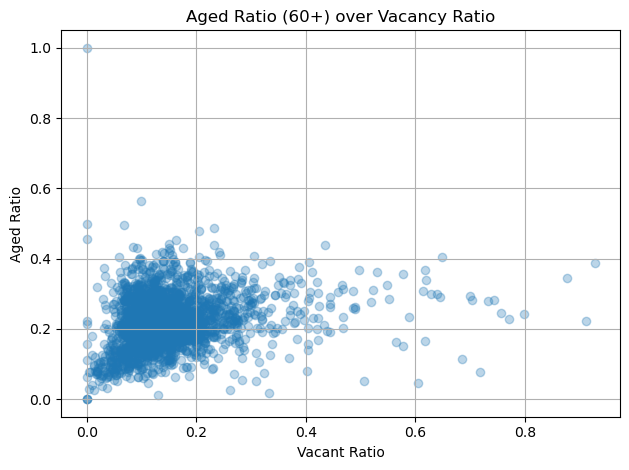

In [9]:
# Example: plot Female_60plus_total and Male_60plus_total

plt.scatter(pr_df_2010["VacantRatio"], pr_df_2010["AgedRatio"], alpha=0.3)

plt.title("Aged Ratio (60+) over Vacancy Ratio")
plt.xlabel("Vacant Ratio")
plt.ylabel("Aged Ratio") 
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
columns_used = ["Total_Population", "Male", "Female", "Pop60plus_total", "AgedRatio", "Total_Housing_Units", "Occupied", "Vacant", "VacantRatio"]


# Combine first 18 columns with the specific ones, avoiding duplicates
selected_cols = list(pr_df_2020.columns[:24]) + columns_used  

pr_df_2020sel = pr_df_2020[selected_cols]

merged_df = pr_df_2020sel.merge(pr_df_2010[["GISJOIN"]+columns_used], on = "GISJOIN", how = "inner", suffixes=("_2020", "_2010"))
merged_df


merged_df

,GISJOIN,YEAR,STUSAB,GEOID,GEOCODE,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,...,VacantRatio_2020,Total_Population_2010,Male_2010,Female_2010,Pop60plus_total_2010,AgedRatio_2010,Total_Housing_Units_2010,Occupied_2010,Vacant_2010,VacantRatio_2010
0,G72000109563001,2020,PR,1500000US720019563001,720019563001,9,0,Puerto Rico,72,Adjuntas Municipio,...,0.102815,2171,1034,1137,363,0.167204,854,737,117,0.137002
1,G72000109563002,2020,PR,1500000US720019563002,720019563002,9,0,Puerto Rico,72,Adjuntas Municipio,...,0.070263,2165,1092,1073,438,0.202309,881,751,130,0.147560
2,G72000109564001,2020,PR,1500000US720019564001,720019564001,9,0,Puerto Rico,72,Adjuntas Municipio,...,0.103064,1852,936,916,322,0.173866,801,677,124,0.154806
3,G72000109564002,2020,PR,1500000US720019564002,720019564002,9,0,Puerto Rico,72,Adjuntas Municipio,...,0.092593,1143,572,571,277,0.242345,493,418,75,0.152130
4,G72000109565001,2020,PR,1500000US720019565001,720019565001,9,0,Puerto Rico,72,Adjuntas Municipio,...,0.138142,2100,1045,1055,346,0.164762,827,682,145,0.175333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,G72015307506011,2020,PR,1500000US721537506011,721537506011,9,0,Puerto Rico,72,Yauco Municipio,...,0.167658,1335,651,684,298,0.223221,565,475,90,0.159292
2245,G72015307506012,2020,PR,1500000US721537506012,721537506012,9,0,Puerto Rico,72,Yauco Municipio,...,0.083146,2986,1380,1606,481,0.161085,1201,1058,143,0.119067
2246,G72015307506013,2020,PR,1500000US721537506013,721537506013,9,0,Puerto Rico,72,Yauco Municipio,...,0.184638,994,505,489,69,0.069416,340,322,18,0.052941
2247,G72015307506021,2020,PR,1500000US721537506021,721537506021,9,0,Puerto Rico,72,Yauco Municipio,...,0.221906,1872,902,970,436,0.232906,813,681,132,0.162362


## Comparing time series 

In [13]:
merged_df["Total_Pop_Change"] = merged_df["Total_Population_2020"] - merged_df["Total_Population_2010"]
merged_df["Pop60plus_Change"] = merged_df["Pop60plus_total_2020"] - merged_df["Pop60plus_total_2010"]
merged_df["Vacant_Change"] = (merged_df["Vacant_2020"] - merged_df["Vacant_2010"])
merged_df["AgedRatio_Change"] = (merged_df["AgedRatio_2020"] - merged_df["AgedRatio_2010"])
merged_df["VacantRatio_Change"] = merged_df["VacantRatio_2020"] - merged_df["VacantRatio_2010"]




merged_df

,GISJOIN,YEAR,STUSAB,GEOID,GEOCODE,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,...,AgedRatio_2010,Total_Housing_Units_2010,Occupied_2010,Vacant_2010,VacantRatio_2010,Total_Pop_Change,Pop60plus_Change,Vacant_Change,AgedRatio_Change,VacantRatio_Change
0,G72000109563001,2020,PR,1500000US720019563001,720019563001,9,0,Puerto Rico,72,Adjuntas Municipio,...,0.167204,854,737,117,0.137002,-287,199,-33,0.131097,-0.034187
1,G72000109563002,2020,PR,1500000US720019563002,720019563002,9,0,Puerto Rico,72,Adjuntas Municipio,...,0.202309,881,751,130,0.147560,-181,130,-74,0.083981,-0.077296
2,G72000109564001,2020,PR,1500000US720019564001,720019564001,9,0,Puerto Rico,72,Adjuntas Municipio,...,0.173866,801,677,124,0.154806,-220,161,-50,0.122090,-0.051742
3,G72000109564002,2020,PR,1500000US720019564002,720019564002,9,0,Puerto Rico,72,Adjuntas Municipio,...,0.242345,493,418,75,0.152130,-130,93,-35,0.122907,-0.059537
4,G72000109565001,2020,PR,1500000US720019565001,720019565001,9,0,Puerto Rico,72,Adjuntas Municipio,...,0.164762,827,682,145,0.175333,-220,177,-32,0.113430,-0.037191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,G72015307506011,2020,PR,1500000US721537506011,721537506011,9,0,Puerto Rico,72,Yauco Municipio,...,0.223221,565,475,90,0.159292,661,189,51,0.020767,0.008366
2245,G72015307506012,2020,PR,1500000US721537506012,721537506012,9,0,Puerto Rico,72,Yauco Municipio,...,0.161085,1201,1058,143,0.119067,-2023,-197,-106,0.133827,-0.035921
2246,G72015307506013,2020,PR,1500000US721537506013,721537506013,9,0,Puerto Rico,72,Yauco Municipio,...,0.069416,340,322,18,0.052941,415,291,107,0.186084,0.131697
2247,G72015307506021,2020,PR,1500000US721537506021,721537506021,9,0,Puerto Rico,72,Yauco Municipio,...,0.232906,813,681,132,0.162362,-513,45,24,0.121031,0.059544


# Plotting Graphs from IPUMS data:

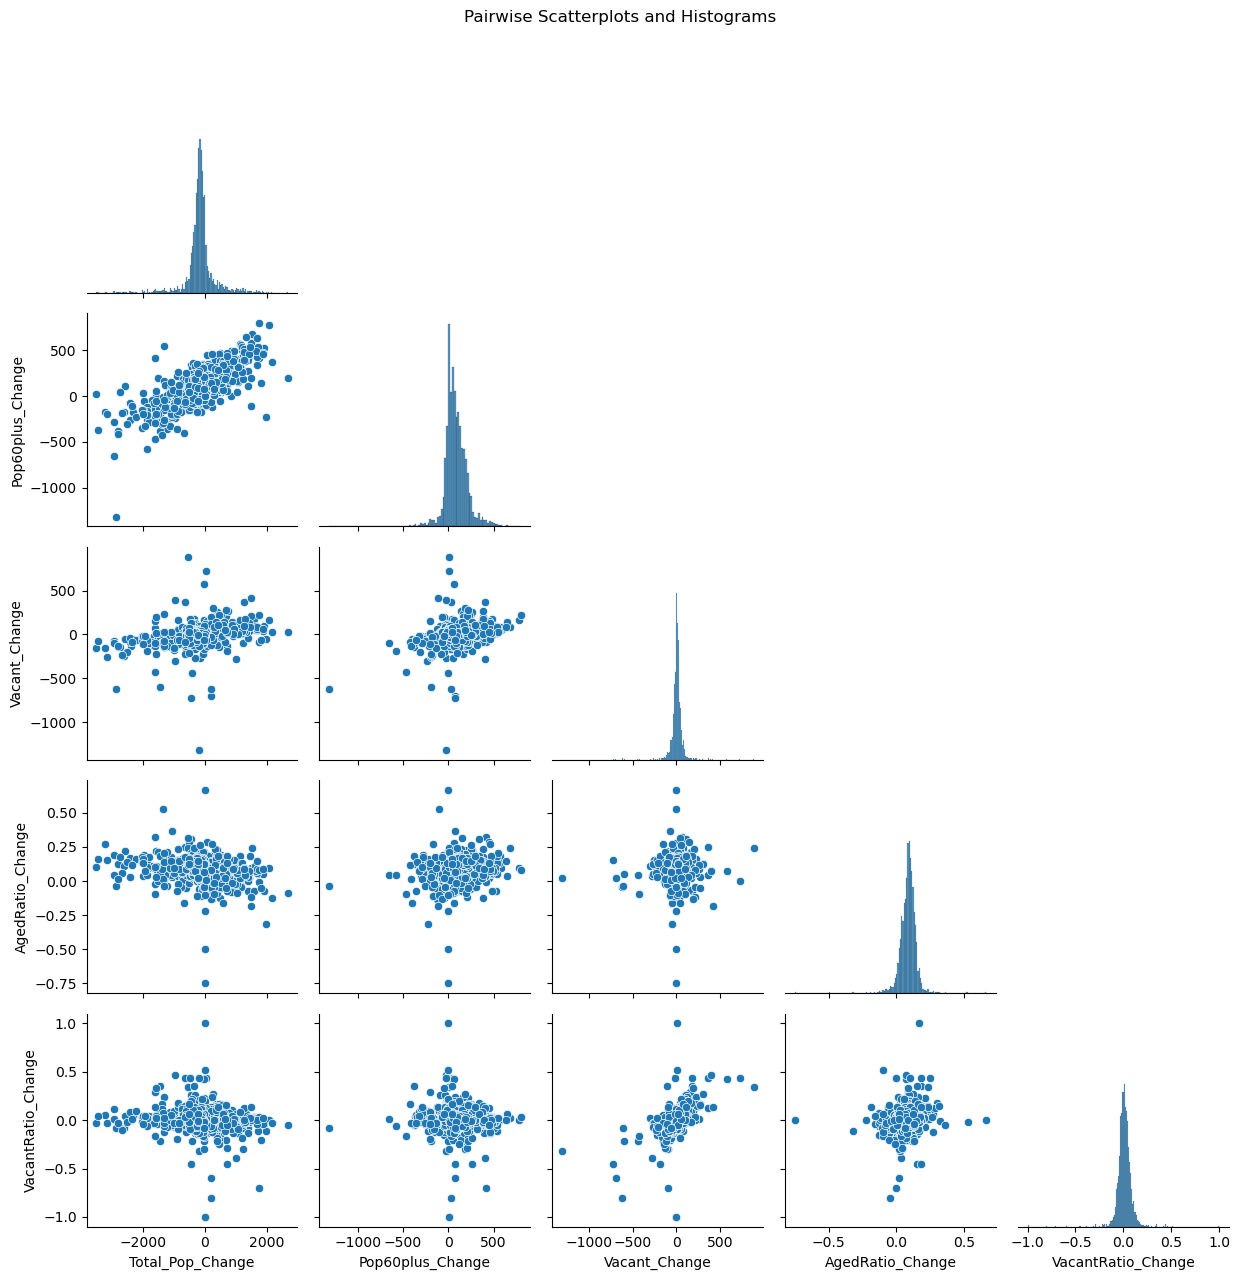

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: choose 5 variables from your DataFrame
vars_to_plot = ["Total_Pop_Change", "Pop60plus_Change", "Vacant_Change", "AgedRatio_Change", "VacantRatio_Change"]

# Subset your dataframe
data_subset = merged_df[vars_to_plot]

# Create the pairplot
sns.pairplot(data_subset, diag_kind="hist", corner=True)

plt.suptitle("Pairwise Scatterplots and Histograms", y=1.02)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Vacancy Ratio Change 2010-2020')

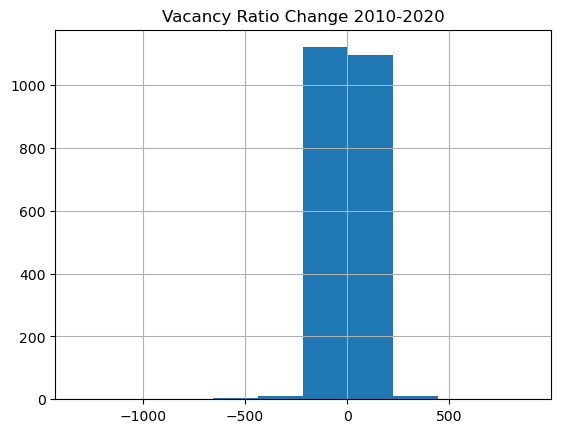

In [15]:
merged_df["Vacant_Change"] .hist()

plt.title("Vacancy Ratio Change 2010-2020")

This histogram answers why the Cabo Rojo's Decadal Vacant Change is in the first quantile. There is only one county (frequency) that has less than -2000 value which is belong to Cabo Rojo. Therefore, Cabo Rojo is classified as lower quantile (1st quantile).
 

By looking more further into the histogram and difference bar chart between 2010 and 2020. We can have more confident that quantile classification did not do the right job at interpreation the data.

In [ ]:
# Compute means and standard deviations
means = merged_df[vars_to_plot].mean()
stds = merged_df[vars_to_plot].std()

# Create z-score columns
for var in vars_to_plot:
    z_col = var.replace("_Change", "_z")
    merged_df[z_col] = (merged_df[var] - means[var]) / stds[var]

Text(0.5, 1.0, 'Male/Female Ratio Total Change 2010-2020 (In thousands) Z-score')

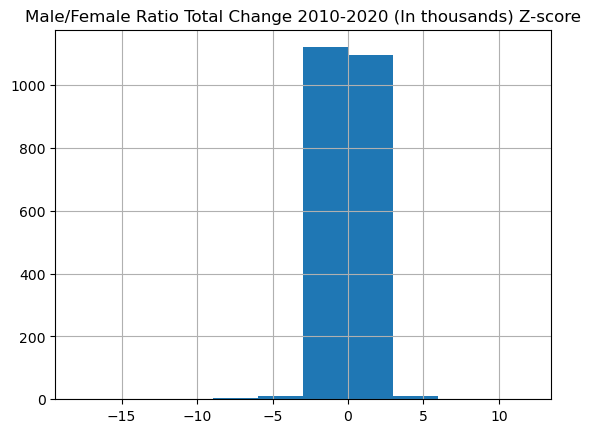

In [24]:
merged_df["Vacant_dz"] .hist()

plt.title("Male/Female Ratio Total Change 2010-2020 (In thousands) Z-score")

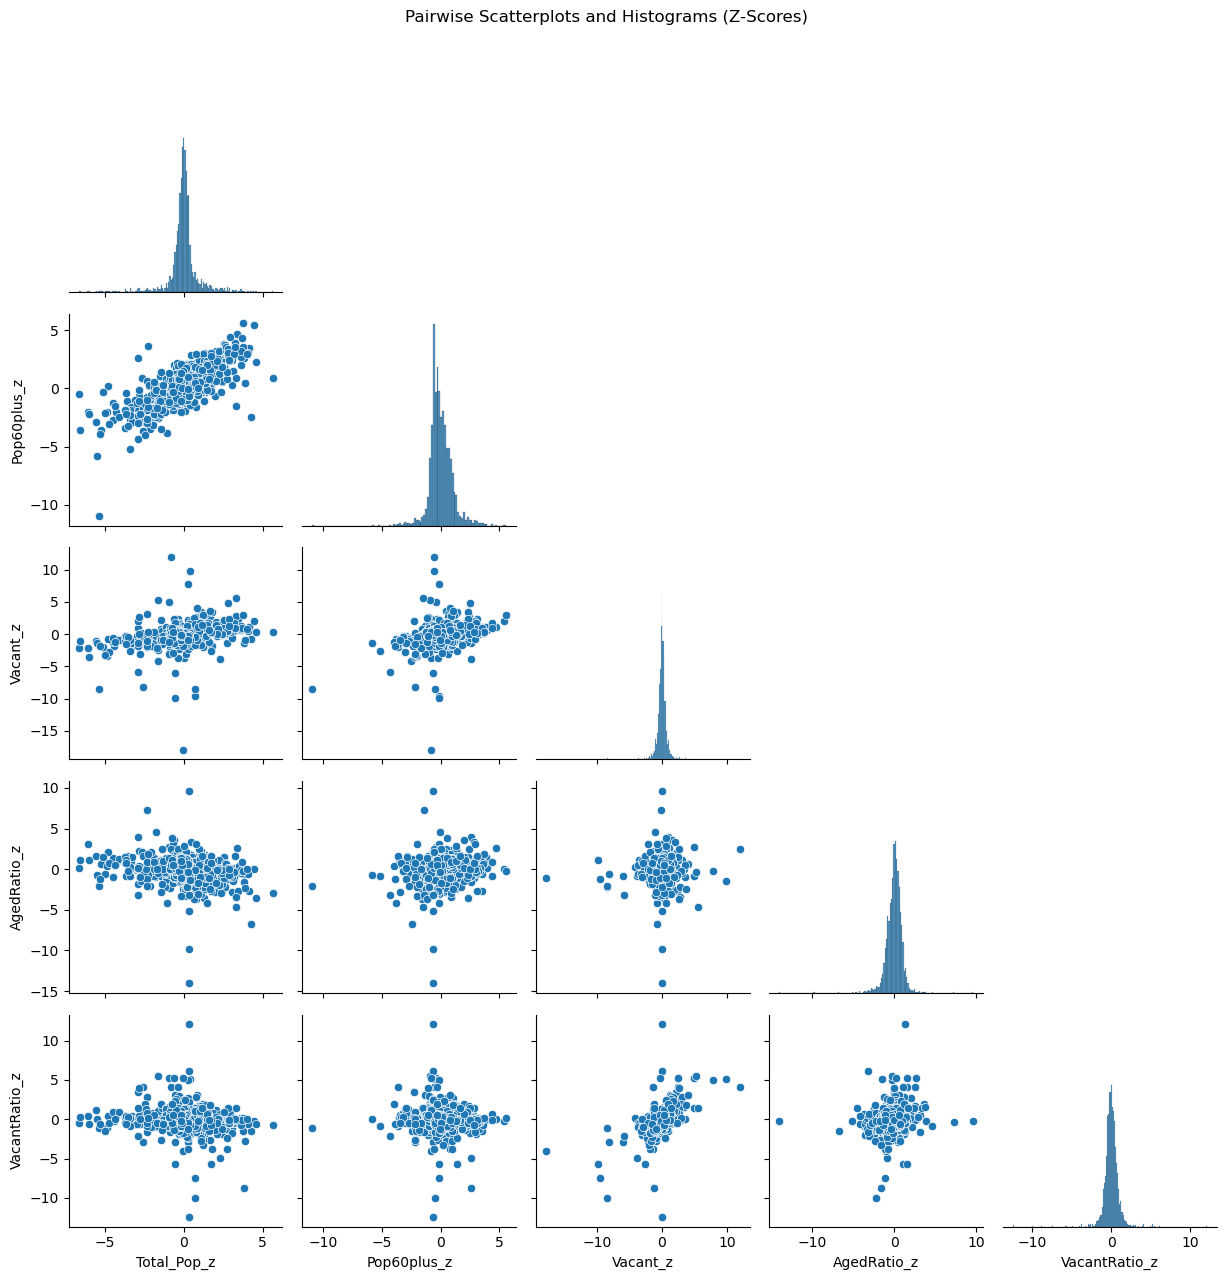

In [25]:
# Select all columns that end with '_z' (z-score columns)
zscore_cols = [col for col in merged_df.columns if col.endswith("_z")]
data_subset = merged_df[zscore_cols]


# Create the pairplot
sns.pairplot(data_subset, diag_kind="hist", corner=True)

plt.suptitle("Pairwise Scatterplots and Histograms (Z-Scores)", y=1.02)
plt.tight_layout()
plt.show()

This histogram answers why the Cabo Rojo's Decadal Vacant Change is in the first quantile. There is only one county (frequency) that has less than -2000 value which is belong to Cabo Rojo. Therefore, Cabo Rojo is classified as lower quantile (1st quantile).


In [27]:
merged_df["VacantRatio_quant"] = pd.qcut(merged_df["VacantRatio_z"], 5, labels = range(1,6)) 


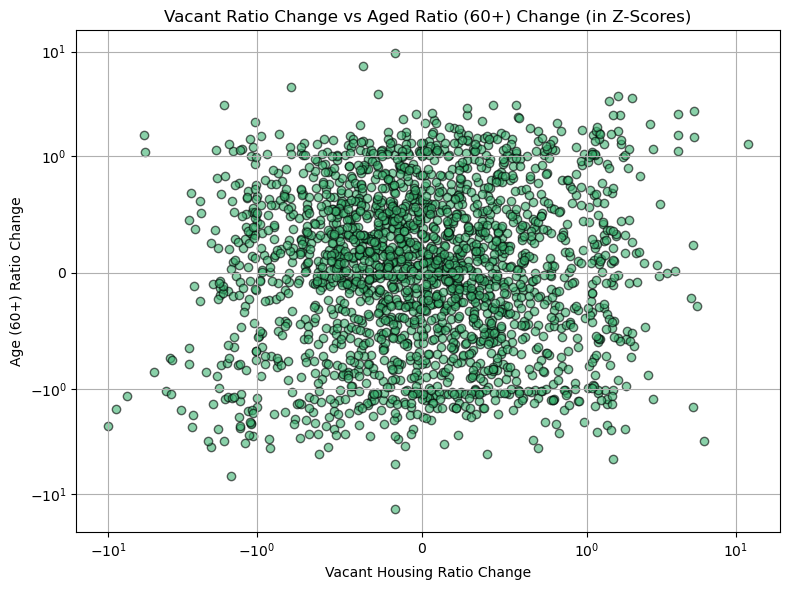

In [28]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter( 
    merged_df["VacantRatio_dz"],
    merged_df["AgedRatio_dz"],
    alpha=0.6,
    color="mediumseagreen",
    edgecolor="black"
)


# Use symmetric log scaling
ax.set_xscale("symlog", linthresh=1)  # linthresh defines the linear range near 0
ax.set_yscale("symlog", linthresh=1)


# Axis formatting
ax.set_xlabel("Vacant Housing Ratio Change")
ax.set_ylabel("Age (60+) Ratio Change")
ax.set_title("Vacant Ratio Change vs Aged Ratio (60+) Change (in Z-Scores)")
ax.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Define the relevant columns
joined_columns = [col for col in pr_sedf_ipums.columns if col.startswith("Male:") or col.startswith("Female:")]

# 2. Ensure Total_Population exists (if not, create it)
if "Total_Population" not in pr_sedf_ipums.columns:
    pr_sedf_ipums["Total_Population"] = pr_sedf_ipums[joined_columns].sum(axis=1)

# 3. Create DataFrame for percentage values
pct_df = pr_sedf_ipums[["Total_Population"] + joined_columns].copy()

# 4. Compute percentage for each age group column
for col in joined_columns:
    pct_df[f"{col}_pct"] = pct_df[col] / pct_df["Total_Population"] * 100

# 5. Drop original count columns, keep only percent columns
pct_df = pct_df[[col for col in pct_df.columns if col.endswith("_pct")]]

# 6. Separate by sex
male_age_percentages = []
female_age_percentages = []

for col in pct_df.columns:
    mean_pct = round(pct_df[col].mean(), 2)
    if col.startswith("Male:"):
        male_age_percentages.append(mean_pct)
    elif col.startswith("Female:"):
        female_age_percentages.append(mean_pct)

# 7. Extract age labels
new_age_columns = [col.split(": ")[1].replace("_pct", "") for col in pct_df.columns if col.startswith("Male:")]

# 8. Create the base DataFrame
population_df = pd.DataFrame({
    "Age": new_age_columns,
    "Male": male_age_percentages,
    "Female": female_age_percentages
})
population = population_df.copy()

# 9. Combine select age groups
# Combine 15-17 and 18-19 into 15-19
population.iloc[3, 0] = "15 to 19 years"
population.iloc[3, 1] += population.iloc[4, 1]
population.iloc[3, 2] += population.iloc[4, 2]
population = population.drop(index=4).reset_index(drop=True)

# Combine 20, 21, 22–24 into 20–24
population.iloc[4, 0] = "20 to 24 years"
population.iloc[4, 1] += population.iloc[5, 1] + population.iloc[6, 1]
population.iloc[4, 2] += population.iloc[5, 2] + population.iloc[6, 2]
population = population.drop(index=[5, 6]).reset_index(drop=True)

# Combine 60–61 and 62–64 into 60–64
population.iloc[12, 0] = "60 to 64 years"
population.iloc[12, 1] += population.iloc[13, 1]
population.iloc[12, 2] += population.iloc[13, 2]
population = population.drop(index=13).reset_index(drop=True)

# Combine 65–66 and 67–69 into 65–69
population.iloc[13, 0] = "65 to 69 years"
population.iloc[13, 1] += population.iloc[14, 1]
population.iloc[13, 2] += population.iloc[14, 2]
population = population.drop(index=14).reset_index(drop=True)

# 10. Prepare for plotting
population["Female_Left"] = 0
population["Female_Width"] = population["Female"]
population["Male_Left"] = -population["Male"]
population["Male_Width"] = population["Male"]

# Round for labels
population["Male"] = population["Male"].round(2)
population["Female"] = population["Female"].round(2)

# 11. Plot the population pyramid
fig = plt.figure(figsize=(15, 10))

plt.barh(y=population["Age"], width=population["Female_Width"], color="#ee7a87", label="Female")
plt.barh(y=population["Age"], width=population["Male_Width"], left=population["Male_Left"],
         color="#4682b4", label="Male")

plt.text(-5, len(population) - 1, "Male", fontsize=25, fontweight="bold")
plt.text(4, len(population) - 1, "Female", fontsize=25, fontweight="bold")

# Add labels
for idx in range(len(population)):
    plt.text(x=population["Male_Left"][idx] - 0.1, y=idx, s="{}%".format(population["Male"][idx]),
             ha="right", va="center", fontsize=15, color="#4682b4")
    plt.text(x=population["Female_Width"][idx] + 0.1, y=idx, s="{}%".format(population["Female"][idx]),
             ha="left", va="center", fontsize=15, color="#ee7a87")

plt.xlim(-7, 7)
plt.xticks(range(-7, 8), ["{}%".format(i) for i in range(-7, 8)])
plt.legend(loc="best")
plt.xlabel("Percent (%)", fontsize=16, fontweight="bold")
plt.ylabel("Age Range", fontsize=16, fontweight="bold")
plt.title("Puerto Rico Mean Age Distribution (Census Blocks)", loc="left", pad=20, fontsize=25, fontweight="bold")

plt.tight_layout()
plt.show()

### Select an individual census block

In [ ]:
# --- STEP 1: Select a census block by GEOID ---
block_id = "721537502022"  # Replace with any valid GEOID
block_df = pr_sedf_ipums[pr_sedf_ipums["GEOID"] == block_id].copy()

assert len(block_df) == 1, f"Expected one row for GEOID {block_id}, but got {len(block_df)}"

# --- STEP 2: Identify male and female age columns ---
male_cols = [col for col in block_df.columns if col.startswith("Male:")]
female_cols = [col for col in block_df.columns if col.startswith("Female:")]
age_labels = [col.split(": ")[1] for col in male_cols]  # Extract age ranges

# --- STEP 3: Get values (choose percent or raw counts) ---
use_percent = True  # Set to False if you want raw counts

if use_percent:
    total_pop = block_df[male_cols + female_cols].sum(axis=1).values[0]
    male_vals = (block_df[male_cols].values[0] / total_pop) * 100
    female_vals = (block_df[female_cols].values[0] / total_pop) * 100
    value_label = "Percent (%)"
else:
    male_vals = block_df[male_cols].values[0]
    female_vals = block_df[female_cols].values[0]
    value_label = "Population Count"

# --- STEP 4: Build plotting dataframe ---
population = pd.DataFrame({
    "Age": age_labels,
    "Male": male_vals,
    "Female": female_vals
})

population["Female_Left"] = 0
population["Female_Width"] = population["Female"]
population["Male_Left"] = -population["Male"]
population["Male_Width"] = population["Male"]

# --- STEP 5: Plot the pyramid ---
fig = plt.figure(figsize=(12, 8))

plt.barh(y=population["Age"], width=population["Female_Width"], color="#ee7a87", label="Female")
plt.barh(y=population["Age"], width=population["Male_Width"], left=population["Male_Left"],
         color="#4682b4", label="Male")

plt.text(-5, len(population) - 1, "Male", fontsize=20, fontweight="bold")
plt.text(4, len(population) - 1, "Female", fontsize=20, fontweight="bold")

for idx in range(len(population)):
    plt.text(x=population["Male_Left"][idx] - 0.1, y=idx, s=f"{round(population['Male'][idx], 1)}",
             ha="right", va="center", fontsize=12, color="#4682b4")
    plt.text(x=population["Female_Width"][idx] + 0.1, y=idx, s=f"{round(population['Female'][idx], 1)}",
             ha="left", va="center", fontsize=12, color="#ee7a87")

xlim_val = max(population[["Male", "Female"]].max()) * 1.2
plt.xlim(-xlim_val, xlim_val)
plt.xticks([])
plt.legend(loc="best")

plt.xlabel(value_label, fontsize=14)
plt.ylabel("Age Range", fontsize=14)
plt.title(f"Census Block {block_id} Age Distribution", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

In [ ]:
bg_name = "Block Group 3"

df_gb = pr_sedf_ipums[pr_sedf_ipums["NAME_x"] == bg_name ]


# 1. Define the relevant columns
joined_columns = [col for col in df_gb.columns if col.startswith("Male:") or col.startswith("Female:")]

# 2. Ensure Total_Population exists (if not, create it)
if "Total_Population" not in df_gb.columns:
    df_gb["Total_Population"] = df_gb[joined_columns].sum(axis=1)

# 3. Create DataFrame for percentage values
pct_df = df_gb[["Total_Population"] + joined_columns].copy()

# 4. Compute percentage for each age group column
for col in joined_columns:
    pct_df[f"{col}_pct"] = pct_df[col] / pct_df["Total_Population"] * 100

# 5. Drop original count columns, keep only percent columns
pct_df = pct_df[[col for col in pct_df.columns if col.endswith("_pct")]]

# 6. Separate by sex
male_age_percentages = []
female_age_percentages = []

for col in pct_df.columns:
    mean_pct = round(pct_df[col].mean(), 2)
    if col.startswith("Male:"):
        male_age_percentages.append(mean_pct)
    elif col.startswith("Female:"):
        female_age_percentages.append(mean_pct)

# 7. Extract age labels
new_age_columns = [col.split(": ")[1].replace("_pct", "") for col in pct_df.columns if col.startswith("Male:")]

# 8. Create the base DataFrame
population_df = pd.DataFrame({
    "Age": new_age_columns,
    "Male": male_age_percentages,
    "Female": female_age_percentages
})
population = population_df.copy()

# 9. Combine select age groups
# Combine 15-17 and 18-19 into 15-19
population.iloc[3, 0] = "15 to 19 years"
population.iloc[3, 1] += population.iloc[4, 1]
population.iloc[3, 2] += population.iloc[4, 2]
population = population.drop(index=4).reset_index(drop=True)

# Combine 20, 21, 22–24 into 20–24
population.iloc[4, 0] = "20 to 24 years"
population.iloc[4, 1] += population.iloc[5, 1] + population.iloc[6, 1]
population.iloc[4, 2] += population.iloc[5, 2] + population.iloc[6, 2]
population = population.drop(index=[5, 6]).reset_index(drop=True)

# Combine 60–61 and 62–64 into 60–64
population.iloc[12, 0] = "60 to 64 years"
population.iloc[12, 1] += population.iloc[13, 1]
population.iloc[12, 2] += population.iloc[13, 2]
population = population.drop(index=13).reset_index(drop=True)

# Combine 65–66 and 67–69 into 65–69
population.iloc[13, 0] = "65 to 69 years"
population.iloc[13, 1] += population.iloc[14, 1]
population.iloc[13, 2] += population.iloc[14, 2]
population = population.drop(index=14).reset_index(drop=True)

# 10. Prepare for plotting
population["Female_Left"] = 0
population["Female_Width"] = population["Female"]
population["Male_Left"] = -population["Male"]
population["Male_Width"] = population["Male"]

# Round for labels
population["Male"] = population["Male"].round(2)
population["Female"] = population["Female"].round(2)

# 11. Plot the population pyramid
fig = plt.figure(figsize=(15, 10))

plt.barh(y=population["Age"], width=population["Female_Width"], color="#ee7a87", label="Female")
plt.barh(y=population["Age"], width=population["Male_Width"], left=population["Male_Left"],
         color="#4682b4", label="Male")

plt.text(-5, len(population) - 1, "Male", fontsize=25, fontweight="bold")
plt.text(4, len(population) - 1, "Female", fontsize=25, fontweight="bold")

# Add labels
for idx in range(len(population)):
    plt.text(x=population["Male_Left"][idx] - 0.1, y=idx, s="{}%".format(population["Male"][idx]),
             ha="right", va="center", fontsize=15, color="#4682b4")
    plt.text(x=population["Female_Width"][idx] + 0.1, y=idx, s="{}%".format(population["Female"][idx]),
             ha="left", va="center", fontsize=15, color="#ee7a87")

plt.xlim(-7, 7)
plt.xticks(range(-7, 8), ["{}%".format(i) for i in range(-7, 8)])
plt.legend(loc="best")
plt.xlabel("Percent (%)", fontsize=16, fontweight="bold")
plt.ylabel("Age Range", fontsize=16, fontweight="bold")
plt.title(f"Puerto Rico Mean Age Distribution ({bg_name})", loc="left", pad=20, fontsize=25, fontweight="bold")

plt.tight_layout()
plt.show()

## Summarizing and Plotting DAta

Let's combine the Block Groups into Counties and Map the results.



## HIEU SUMMARIZE merged_df TO COUNTY (pd_county_df) using "sum" to add:  "Total_Population", "Male", "Female", "Pop60plus_total",  "Total_Housing_Units", "Occupied", "Vacant",  for all have _2010 and _2020 at the end. 



### Hieu Recalculate CHange

In [48]:
excluding_cols = list(df_2020.iloc[:5, :59].columns)
cols_to_sum = [col for col in df_2020.columns if col not in excluding_cols]

In [80]:
county_2020 = df_2020.groupby(["COUNTY"])[cols_to_sum].sum().reset_index()
county_2010 = df_2010.groupby(["COUNTY"])[cols_to_sum].sum().reset_index()


county_2010["Pop60plus_total"] = county_2010[pop60plus_cols].sum(axis=1)
county_2010["AgedRatio"] = county_2010["Pop60plus_total"] /  county_2010["Total_Population"]
county_2010["VacantRatio"] = county_2010["Vacant"] /  county_2010["Total_Housing_Units"]

county_2020["Pop60plus_total"] = county_2020[pop60plus_cols].sum(axis=1)
county_2020["AgedRatio"] = county_2020["Pop60plus_total"] /  county_2020["Total_Population"]
county_2020["VacantRatio"] = county_2020["Vacant"] /  county_2020["Total_Housing_Units"]


pr_county_df = county_2020.merge(county_2010, on="COUNTY", suffixes=("_2020", "_2010"))



In [86]:
pr_county_df["AgedRatio_2010"] = pr_county_df["Pop60plus_total_2010"] /  pr_county_df["Total_Population_2010"]
pr_county_df["VacantRatio_2010"] = pr_county_df["Vacant_2010"] /  pr_county_df["Total_Housing_Units_2010"]


pr_county_df["AgedRatio_2020"] = pr_county_df["Pop60plus_total_2020"] /  pr_county_df["Total_Population_2020"]
pr_county_df["VacantRatio_2020"] = pr_county_df["Vacant_2020"] /  pr_county_df["Total_Housing_Units_2020"]

In [87]:
pr_county_df["Total_Pop_Change"] = pr_county_df["Total_Population_2020"] - pr_county_df["Total_Population_2010"]
pr_county_df["Pop60plus_Change"] = pr_county_df["Pop60plus_total_2020"] - pr_county_df["Pop60plus_total_2010"]
pr_county_df["Vacant_Change"] = (pr_county_df["Vacant_2020"] - pr_county_df["Vacant_2010"])

pr_county_df["VacantRatio_Change"] = pr_county_df["VacantRatio_2020"] - pr_county_df["VacantRatio_2010"]

pr_county_df["AgedRatio_Change"] = (pr_county_df["AgedRatio_2020"] - pr_county_df["AgedRatio_2010"])


pr_county_df

,COUNTY,Total_Population_2020,Male_2020,Male: Under 5 years_2020,Male: 5 to 9 years_2020,Male: 10 to 14 years_2020,Male: 15 to 17 years_2020,Male: 18 and 19 years_2020,Male: 20 years_2020,Male: 21 years_2020,...,Occupied_2010,Vacant_2010,Pop60plus_total_2010,AgedRatio_2010,VacantRatio_2010,Total_Pop_Change,Pop60plus_Change,Vacant_Change,VacantRatio_Change,AgedRatio_Change
0,Adjuntas Municipio,18020,8634,307,425,544,344,242,132,93,...,6851,1274,3726,0.191244,0.156800,-1463,1696,-344,-0.039242,0.109644
1,Aguada Municipio,38136,18619,566,945,1032,634,494,277,259,...,15156,3102,7621,0.181630,0.169898,-3823,3645,-802,-0.037425,0.113787
2,Aguadilla Municipio,55101,26569,943,1334,1567,1073,644,349,338,...,23552,4878,13403,0.219905,0.171579,-5848,3328,33,0.004682,0.083737
3,Aguas Buenas Municipio,24223,11663,432,526,707,448,343,162,143,...,10040,1450,5406,0.188632,0.126197,-4436,1872,-321,-0.019213,0.111826
4,Aibonito Municipio,24637,11786,469,626,728,430,332,145,149,...,9367,1042,5146,0.198687,0.100106,-1263,2539,-166,-0.020128,0.113242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Vega Baja Municipio,54414,26090,1088,1277,1631,1021,752,364,347,...,21335,4066,11784,0.197513,0.160072,-5248,3512,232,0.006918,0.083591
74,Vieques Municipio,8249,4041,180,219,237,135,94,51,29,...,3666,1875,2204,0.236964,0.338387,-1052,373,-121,-0.007630,0.075438
75,Villalba Municipio,22093,10548,446,495,652,412,363,178,123,...,8373,1337,4263,0.163502,0.137693,-3980,1965,-451,-0.037862,0.118397
76,Yabucoa Municipio,30426,14675,529,646,790,563,417,198,159,...,13507,2291,7233,0.190638,0.145018,-7515,2346,-249,-0.002051,0.124191


In [99]:
# Compute means and standard deviations
means = pr_county_df[vars_to_plot].mean()
stds = pr_county_df[vars_to_plot].std()

# Create z-score columns
for var in vars_to_plot:
    z_col = var.replace("_Change", "_dz")
    pr_county_df[z_col] = (pr_county_df[var] - means[var]) / stds[var]



In [ ]:

common_counties = list(pr_county_df["COUNTY"].unique())

In [101]:
pr_county_df["AgedRatio_quant"] = pd.qcut(pr_county_df["AgedRatio_dz"], 5, labels = range(1,6)) 


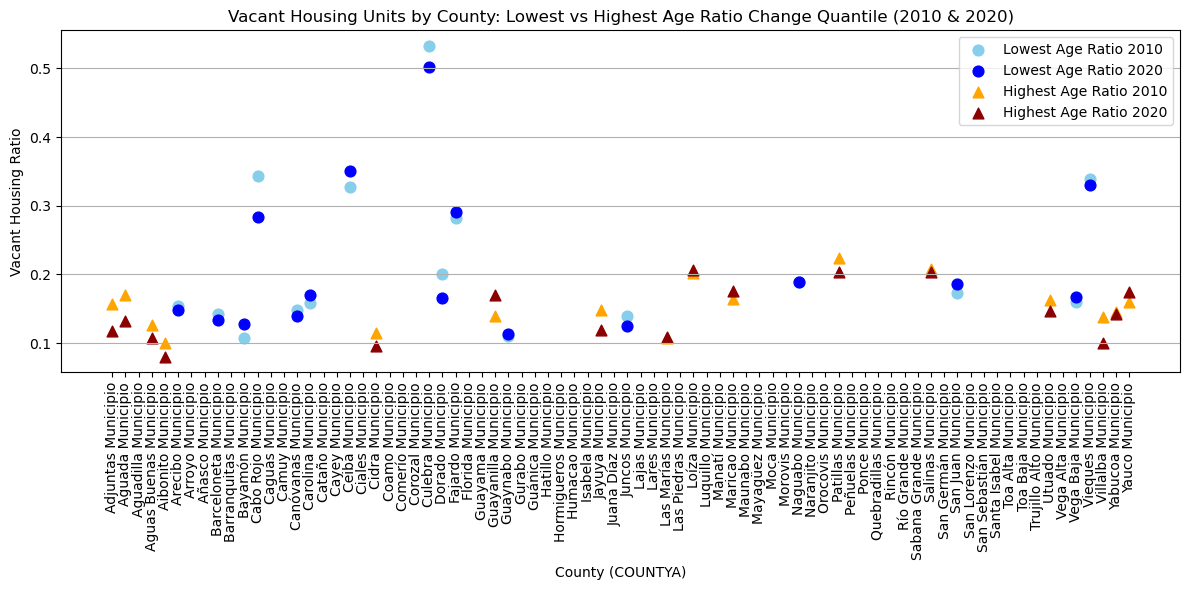

In [102]:
# Filter for lowest and highest vacancy quantile groups
lowest = pr_county_df[pr_county_df["AgedRatio_quant"] == 1]
highest = pr_county_df[pr_county_df["AgedRatio_quant"] == 5]


# Use COUNTYA for grouping (could be COUNTY if preferred)
# Step 1: Find common counties between the two groups
common_counties = list(pr_county_df["COUNTY"].unique())

# Step 2: Group and sum vacant housing units for 2010 and 2020, reindexed by common counties
vacant_low_2010 = lowest[lowest["COUNTY"].isin(common_counties)] \
    .groupby("COUNTY")["VacantRatio_2010"].sum().reindex(common_counties)
vacant_low_2020 = lowest[lowest["COUNTY"].isin(common_counties)] \
    .groupby("COUNTY")["VacantRatio_2020"].sum().reindex(common_counties)

vacant_high_2010 = highest[highest["COUNTY"].isin(common_counties)] \
    .groupby("COUNTY")["VacantRatio_2010"].sum().reindex(common_counties)
vacant_high_2020 = highest[highest["COUNTY"].isin(common_counties)] \
    .groupby("COUNTY")["VacantRatio_2020"].sum().reindex(common_counties)

# Step 3: Plot
x = np.arange(len(common_counties))  # consistent X positions

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(x, vacant_low_2010.values, label='Lowest Age Ratio 2010', color='skyblue', marker='o', s=60)
ax.scatter(x, vacant_low_2020.values, label='Lowest Age Ratio 2020', color='blue', marker='o', s=60)
ax.scatter(x, vacant_high_2010.values, label='Highest Age Ratio 2010', color='orange', marker='^', s=60)
ax.scatter(x, vacant_high_2020.values, label='Highest Age Ratio 2020', color='darkred', marker='^', s=60)

# Formatting
ax.set_ylabel('Vacant Housing Ratio')
ax.set_xlabel('County (COUNTYA)')
ax.set_title('Vacant Housing Units by County: Lowest vs Highest Age Ratio Change Quantile (2010 & 2020)')
ax.set_xticks(x)
ax.set_xticklabels(common_counties, rotation=90)
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()


# Mapping data



## Start preprocessing the Census data downloaded from IPUMS API

To map the shapefile to the map, we have to publish the shapefile as feature layer on MapViewer on ArcGIS Online by adding layer from your shapefile zipped folder. 

This lesson is public facing so we already published the layers for the learners.


In [103]:
# Explicit interactive authentication
gis = GIS("https://www.arcgis.com", authenticate='interactive')


# Get the layer from the published data

results = gis.content.search("Census County Esri_US_Federal_Data", item_type="Feature Layer")
for r in results:
    print(r)

<Item title:"ACS Poverty Status Variables - Boundaries" type:Feature Layer Collection owner:esri_demographics>
<Item title:"USA Structures" type:Feature Layer Collection owner:Esri_US_Federal_Data>
<Item title:"Census ZIP Code Tabulation Areas" type:Feature Layer Collection owner:Esri_US_Federal_Data>
<Item title:"USDA Census of Agriculture 2017 - Federal Payments" type:Feature Layer Collection owner:esri_landscape2>
<Item title:"Transportation" type:Feature Layer Collection owner:Esri_US_Federal_Data>
<Item title:"Flood Factor risk statistics (v2.0) - Full Dataset" type:Feature Layer Collection owner:blewis_worldmap>
<Item title:"Hawaiian Home Lands" type:Feature Layer Collection owner:Esri_US_Federal_Data>
<Item title:"ACS Poverty Status Variables - Centroids" type:Feature Layer Collection owner:esri_demographics>
<Item title:"Consolidated Cities" type:Feature Layer Collection owner:Esri_US_Federal_Data>
<Item title:"Dickinson Area Functional Class_WFL1" type:Feature Layer Collection

Select the position of the "Cansus Zip Code Tabulation Areas" layer starting with position the first position as `0`. 

In [104]:
#select the appropiate item
zip_item = results[3]
item_id = zip_item.id
print(f"Title: {zip_item.title}")
print(f"ID: {item_id}")


Title: USDA Census of Agriculture 2017 - Federal Payments
ID: ccfe5a9e3eea4ec68b7945b610422b0a


With the item's ID (ccfe5a9e3eea4ec68b7945b610422b0a) from ablove, we can  use the layers for analysis

In [105]:
from arcgis.features import FeatureLayer
# Authenticate interactively
gis = GIS("https://www.arcgis.com", authenticate='interactive')
layer = gis.content.get(item_id).layers[0] # The layer of PR county 2020 published to the portal
# Print all field names
field_names = [field['name'] for field in layer.properties.fields]
print(field_names)
print(layer.url)
layer = FeatureLayer(layer.url)

['OBJECTID', 'state_name', 'state_code', 'county_name', 'county_code', 'GOVT_PROGRAMS_FEDERAL_OPERATION', 'GOVT_PROGRAMS_FEDERAL_RECEIPTS_', 'GOVT_PROGRAMS_FEDERAL_RECEIPTS1', 'GOVT_PROGRAMS_FEDERAL_EXCL_CONS', 'GOVT_PROGRAMS_FEDERAL_EXCL_CO_1', 'GOVT_PROGRAMS_FEDERAL_EXCL_CO_2', 'GOVT_PROGRAMS_FEDERAL_CONSERVAT', 'GOVT_PROGRAMS_FEDERAL_CONSERV_1', 'GOVT_PROGRAMS_FEDERAL_CONSERV_2', 'Shape__Area', 'Shape__Length', 'GlobalID']
https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/Federal_Payments/FeatureServer/0


## Hieu Change this for Change this for County to display the "COUNTY" name in the label and either VacancyRatio_dz 

In [115]:
pr_county_df[["COUNTY", "VacantRatio_dz"]]

,COUNTY,VacantRatio_dz
0,Adjuntas Municipio,-1.413984
1,Aguada Municipio,-1.340238
2,Aguadilla Municipio,0.368515
3,Aguas Buenas Municipio,-0.601176
4,Aibonito Municipio,-0.638295
...,...,...
73,Vega Baja Municipio,0.459244
74,Vieques Municipio,-0.131146
75,Villalba Municipio,-1.357980
76,Yabucoa Municipio,0.095264


In [120]:
gis = GIS()
pr_county_layer = gis.content.get("3132216944b249a08d13b1aa0ee6fda2").layers[0] # The layer of PR county 2020 published to the portal


sedf = pr_county_layer.query(where = "STATEFP = '72'").sdf

pr_county_sedf = sedf.merge(pr_county_df, on=(sedf["NAMELSAD"], pr_county_df["COUNTY"]), how="inner")

In [121]:
pr_county_sedf

,key_0,key_1,FID,GISJOIN,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,...,Pop60plus_Change,Vacant_Change,VacantRatio_Change,AgedRatio_Change,Total_Pop_dz,Pop60plus_dz,Vacant_dz,AgedRatio_dz,VacantRatio_dz,AgedRatio_quant
0,Adjuntas Municipio,Adjuntas Municipio,3144,G7200010,72,001,01804480,72001,Adjuntas,Adjuntas Municipio,...,1696,-344,-0.039242,0.109644,0.565474,-0.463686,-0.518574,0.971469,-1.413984,5
1,Aguada Municipio,Aguada Municipio,3145,G7200030,72,003,01804481,72003,Aguada,Aguada Municipio,...,3645,-802,-0.037425,0.113787,0.245977,0.508234,-1.289122,1.254556,-1.340238,5
2,Aguadilla Municipio,Aguadilla Municipio,3146,G7200050,72,005,01804482,72005,Aguadilla,Aguadilla Municipio,...,3328,33,0.004682,0.083737,-0.028168,0.350154,0.115699,-0.798963,0.368515,2
3,Aguas Buenas Municipio,Aguas Buenas Municipio,3147,G7200070,72,007,01804483,72007,Aguas Buenas,Aguas Buenas Municipio,...,1872,-321,-0.019213,0.111826,0.162989,-0.375919,-0.479878,1.120592,-0.601176,5
4,Aibonito Municipio,Aibonito Municipio,3148,G7200090,72,009,01804484,72009,Aibonito,Aibonito Municipio,...,2539,-166,-0.020128,0.113242,0.592550,-0.043302,-0.219103,1.217328,-0.638295,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Vega Baja Municipio,Vega Baja Municipio,3217,G7201450,72,145,01804553,72145,Vega Baja,Vega Baja Municipio,...,3512,232,0.006918,0.083591,0.053060,0.441910,0.450500,-0.808924,0.459244,1
74,Vieques Municipio,Vieques Municipio,3218,G7201470,72,147,01804554,72147,Vieques,Vieques Municipio,...,373,-121,-0.007630,0.075438,0.621115,-1.123434,-0.143394,-1.366133,-0.131146,1
75,Villalba Municipio,Villalba Municipio,3219,G7201490,72,149,01804555,72149,Villalba,Villalba Municipio,...,1965,-451,-0.037862,0.118397,0.224722,-0.329542,-0.698593,1.569598,-1.357980,5
76,Yabucoa Municipio,Yabucoa Municipio,3220,G7201510,72,151,01804556,72151,Yabucoa,Yabucoa Municipio,...,2346,-249,-0.002051,0.124191,-0.253846,-0.139546,-0.358744,1.965586,0.095264,5


### Use ClassBreakInfo to create a class break classification for Vacancy Ratio

<Axes: >

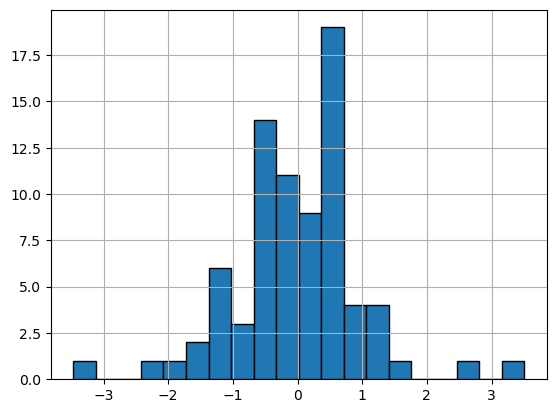

In [153]:
pr_county_sedf["VacantRatio_dz"].hist(bins=20, edgecolor='black')

In [ ]:
# Define the class breaks with proper data classes

z_min = pr_county_sedf["VacantRatio_dz"].min()
z_max = pr_county_sedf["VacantRatio_dz"].max()


class_break_infos = [
    ClassBreakInfo(
        class_max_value= z_min ,
        label="Lowest Z-Score",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [254,229,217],  
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
    ClassBreakInfo(
        class_max_value= -2 ,
        label="Lowest to -2 Z-Score",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [252,187,161],  
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
    ClassBreakInfo(
        class_max_value= -1,
        label="-2 to -1 Z-Score",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [252,146,114],  
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
    ClassBreakInfo(
        class_max_value=0,
        label="-1 to 0 Z-Score",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [251,106,74],  
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
    ClassBreakInfo(
        class_max_value=1,
        label="0 to 1 Z-Score",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [239,59,44],  
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
    ClassBreakInfo(
        class_max_value=2,
        label="1 to 2 Z-Score",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [203,24,29], 
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
    ClassBreakInfo(
        class_max_value=z_max,
        label="2 to Largest Z-Score",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [153,0,13],
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
]

# Create the ClassBreaksRenderer using the new dataclass structure
class_breaks_renderer = ClassBreaksRenderer(
    field="VacantRatio_dz",
    class_break_infos=class_break_infos,
    normalization_type=None,  # Change to 'esriNormalizeByField' if you want normalization
)


pr_labeling_info = [
    {
        "labelExpression": "[NAME]",
        "labelPlacement": "esriServerPolygonPlacementAlwaysHorizontal",
        "repeatLabel": True,
        "symbol": {
            "type": "esriTS",
            "color": [0, 0, 0, 255],
            "font": {
                "family": "Arial",
                "size": 12
            },
            "horizontalAlignment": "center",
            "kerning": True
        }
    }
]

pr_options_dict = {
    "showLabels": True,
    "layerDefinition": {
        "drawingInfo": {
            "labelingInfo": pr_labeling_info,
            "renderer": class_breaks_renderer.dict(),
        }
    },
    "title": "Vacant Housing Units Decadal Change",
}

m1 = Map("Puerto Rico")
m1.content.add(pr_county_sedf, options = pr_options_dict)


m1

Map(center=[2063620.7690671808, -7399290.049500733], extent={'xmin': -7498920.993760712, 'ymin': 1958993.94058…

In [168]:
m1.legend.enabled = True


# Search for LECZ MERIT-DEM layer on ArcGIS Online's Living Atlas portal.

With the arcgis package, we can search online for the polygons of the LECZ areas in Puerto Rico





<Item title:"Low Elevation Coastal Zones derived from MERIT-DEM" type:Imagery Layer owner:NASA_Earthdata>
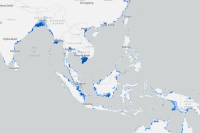

In [265]:
lecz = gis.content.search("title:Low Elevation Coastal Zones derived from MERIT-DEM", item_type="Imagery Layer")

for item in lecz:
    display(item)

lecz_layer = lecz[0]  # Assuming the first layer is the one you want


### Create a map to examine which counties are exposed to LECZ visually

In [266]:
lecz_exposed = Map("Puerto Rico")
lecz_exposed.content.add(pr_county_sedf, options = pr_options_dict)
lecz_exposed.content.add(lecz_layer, options = {"opacity": 0.5, "title": "Low Elevation Coastal Zones"})
lecz_exposed

Map(center=[2063620.7690671808, -7399290.049500733], extent={'xmin': -7498920.993760712, 'ymin': 1958993.94058…

### The map above shows us the intersection between two vectors of LECZ layer and county level Vacant Ratio layer. 

Due to the limitation of analysis performing costs (Credits) for the learners. We assume the learners do not have an ESRI account which has credits, we performed the intersecting task beforehand to make the lesson smoothly. The learners just have to pull the intersected layer that TOPSTSCHOOL already performed the task on behalf of the learners.

Intersection Analysis:
- Added Population layer at county level
- Added LECZ layer

![](https://raw.githubusercontent.com/hieutrn1205/TOPSTSCHOOL-disasters/refs/heads/main/lecz_notebook/image/2_layers_overlayed.png)

- Selected the tool named Find by Attributes and Location with Spatial Query
- Chose Intersect between two layers (Population & LECZ)
- Estimated the credits used (>4 credits)

![](https://raw.githubusercontent.com/hieutrn1205/TOPSTSCHOOL-disasters/refs/heads/main/lecz_notebook/image/credit_estimated.png)

After performed the interected spatially selection for 2 layers we have the new layer with all the fields from 2 layers.

![](https://raw.githubusercontent.com/hieutrn1205/TOPSTSCHOOL-disasters/refs/heads/main/lecz_notebook/image/intersected.png)

In [245]:
intersected_layer = gis.content.get("efbf0b172c914f3fbbc85e190082975b").layers[0]

#Convert the vector to the dataframe to 
intersected_df = intersected_layer.query(where = "1 = 1").sdf

exposed_county = intersected_df["NAME"].value_counts().keys().tolist()

for idx, row in pr_county_sedf.iterrows():
    pr_county_sedf.loc[idx, "Exposed"] = False
    if row["NAME"] in exposed_county:
        pr_county_sedf.loc[idx, "Exposed"] = True

pr_county_sedf[["NAME", "Exposed"]].head()

,NAME,Exposed
0,Adjuntas,False
1,Aguada,True
2,Aguadilla,True
3,Aguas Buenas,False
4,Aibonito,False


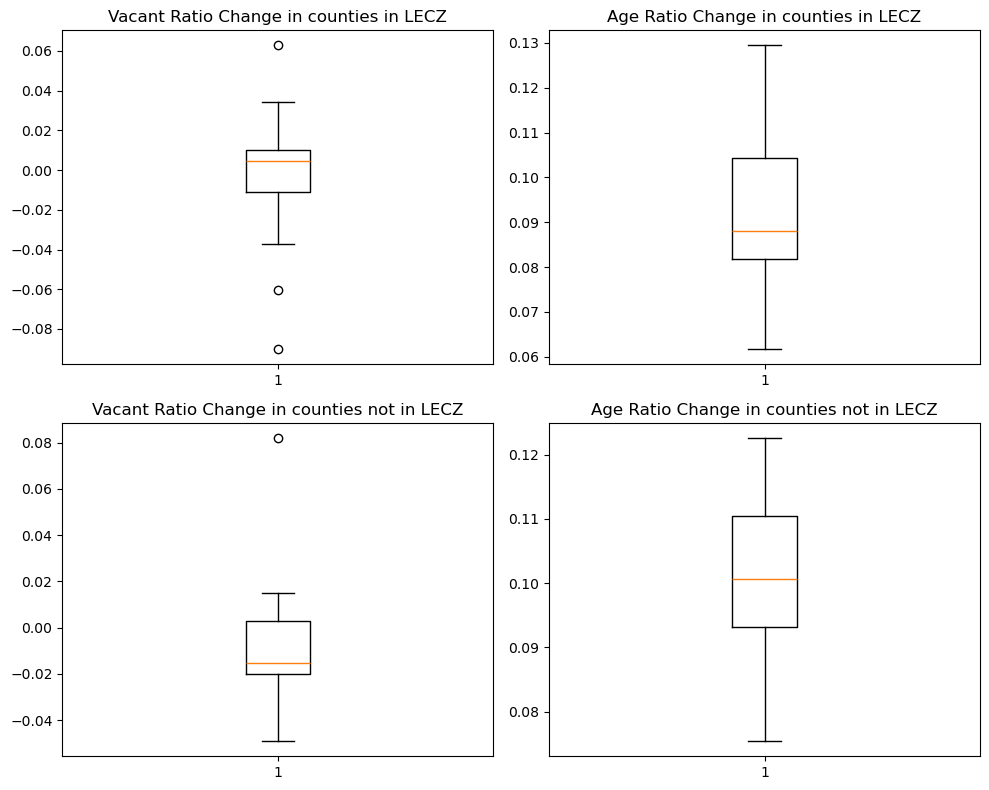

In [248]:
in_lecz = pr_county_sedf[pr_county_sedf["Exposed"] == True]
not_in_lecz = pr_county_sedf[pr_county_sedf["Exposed"] == False]


fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Top-left subplot
axs[0, 0].boxplot(in_lecz["VacantRatio_Change"])
axs[0, 0].set_title('Vacant Ratio Change in counties in LECZ')

# Top-right subplot
axs[0, 1].boxplot(in_lecz["AgedRatio_Change"])
axs[0, 1].set_title('Age Ratio Change in counties in LECZ')

# Bottom-left subplot
axs[1, 0].boxplot(not_in_lecz["VacantRatio_Change"])
axs[1, 0].set_title('Vacant Ratio Change in counties not in LECZ')

# Bottom-right subplot
axs[1, 1].boxplot(not_in_lecz["AgedRatio_Change"])
axs[1, 1].set_title('Age Ratio Change in counties not in LECZ')

plt.tight_layout()
plt.show()

In [258]:
# Define the class breaks with proper data classes

z_min = in_lecz["AgedRatio_dz"].min()
z_max = in_lecz["AgedRatio_dz"].max()


class_break_infos = [
    ClassBreakInfo(
        class_max_value= z_min ,
        label="Lowest Z-Score",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [254,229,217],  
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
    ClassBreakInfo(
        class_max_value= -1,
        label="-2 to -1 Z-Score",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [252,146,114],  
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
    ClassBreakInfo(
        class_max_value=0,
        label="-1 to 0 Z-Score",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [251,106,74],  
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
    ClassBreakInfo(
        class_max_value=1,
        label="0 to 1 Z-Score",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [239,59,44],  
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
    ClassBreakInfo(
        class_max_value=z_max,
        label="2 to Largest Z-Score",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [153,0,13],
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
]

# Create the ClassBreaksRenderer using the new dataclass structure
class_breaks_renderer = ClassBreaksRenderer(
    field="AgedRatio_dz",
    class_break_infos=class_break_infos,
    normalization_type=None,  # Change to 'esriNormalizeByField' if you want normalization
)


pr_labeling_info = [
    {
        "labelExpression": "[NAME]",
        "labelPlacement": "esriServerPolygonPlacementAlwaysHorizontal",
        "repeatLabel": True,
        "symbol": {
            "type": "esriTS",
            "color": [0, 0, 0, 255],
            "font": {
                "family": "Arial",
                "size": 12
            },
            "horizontalAlignment": "center",
            "kerning": True
        }
    }
]

pr_options_dict = {
    "showLabels": True,
    "layerDefinition": {
        "drawingInfo": {
            "labelingInfo": pr_labeling_info,
            "renderer": class_breaks_renderer.dict(),
        }
    },
    "title": "Vacant Housing Units Decadal Change",
}


in_lecz_map = Map("Puerto Rico")
in_lecz_map.content.add(in_lecz, options = pr_options_dict)
# in_lecz_map.content.add(lecz_layer, options = {"opacity": 0.5})
in_lecz_map

Map(center=[2063620.7690671808, -7399290.049500733], extent={'xmin': -7498920.993760712, 'ymin': 1958993.94058…

In [259]:
in_lecz_map.legend.enabled = True